# Plotting robots with PyCTCR
**Disclaimer: This page is available as a notebook. The animation described are only available, when execution the cells in jupyter notebook**
The PyCTCR library offers a flexible and extendable plotting/visualization functionality. 
In this small tutorial you will see how to plot the robot and generate an animation given external forces and movements

## Imports
We import a yaml function that encapsulates the code we saw in the first tutorial and the necessary classes to visualize our robot using Matplotlib as backend.

In [ ]:
import numpy as np
from pyctcr.yaml_to_model import load_continous_ctcr_model
from pyctcr.visualization.scenes import Scene, MatplotLib, Robot
%matplotlib notebook

## Instatiating a visualizable robot intance
Let's create the robot

In [2]:
robot = Robot(load_continous_ctcr_model, "../../example_robots/ctr_robot.yaml")
ctr = robot.model

As you see the class `Robot` is a wrapper class containing the alreay known `ConcentricTubeContinuumRobot` class. It adds futher functionality needed to plot the robot and its movements.

## Visualize the robot and animate
In the follwing cells, we create a `Scene` class which encapsulates all functionality necessary to plot and animate robots. 
*TODO* In following releases the ability to add objects and simulate contacts will be added

<IPython.core.display.Javascript object>


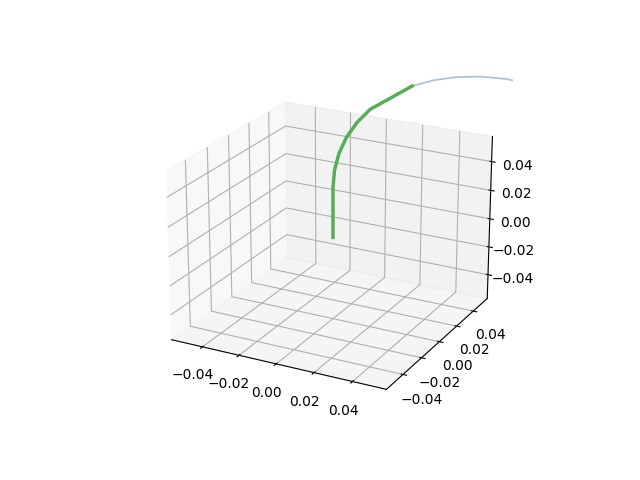

In [3]:
test_scene = Scene(MatplotLib())
test_scene.add_robot('ctcr', robot)
test_scene.update()
fig, ani = test_scene.show()

In the cell above, we instanciated the `Scene` class and added the already created robot class. Further, we updated the scene. This functions is important. Everytime you call this funtion a snapshot of all robot in the scene with their current configuration and state is made and saved. The visualization utils of the PyCTCR will then create an animation based on the cronological call order of the `update` function.
Given this information, let's generate a rotating robot:

In [4]:
test_scene.reset()
for alpha in np.linspace(0, 2*np.pi, 100):
    robot.set_config([alpha, -alpha], [0,0])
    test_scene.update()
fig, ani = test_scene.show()

The first line resets the scene. We do this to flush out all already saved frames and empty the buffer for our new animation. The next lines rotate the tubes 360° around in oposite directions. 

## Apply external force to the robot
The following code shows how to do the same by pushing agains the robots tip with an increasing force in y direction wrt to the local frame of the tip

In [ ]:
test_scene.reset()
for y_force in np.linspace(0, 0.4, 100):
    robot.apply_tip_wrench(np.array([0,y_force,0,0,0,0]))
    test_scene.update()
fig, ani = test_scene.show()

D:\anaconda\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-cd92a1a05ef1>", line 4, in <module>
    test_scene.update()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\visualization\scenes.py", line 237, in update
    positions, rotations, wrenches, _, _ = self.robots[rob].calc_fwd()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\visualization\scenes.py", line 273, in calc_fwd
    return self.fwd_foo()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\robots.py", line 334, in push_end
    positions, orientations, wrenches, uzs, thetas = self.fwd_static_with_boundarys(state, shooting_function_force, step_size)
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\robots.py", line 325, in fwd_static_with_boundarys
    solution_bvp = least_squares(shooti

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-cd92a1a05ef1>", line 4, in <module>
    test_scene.update()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\visualization\scenes.py", line 237, in update
    positions, rotations, wrenches, _, _ = self.robots[rob].calc_fwd()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\visualization\scenes.py", line 273, in calc_fwd
    return self.fwd_foo()
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\robots.py", line 334, in push_end
    positions, orientations, wrenches, uzs, thetas = self.fwd_static_with_boundarys(state, shooting_function_force, step_size)
  File "C:\Users\Anwender\PycharmProjects\continuum_robot_models\pyctcr\robots.py", line 325, in fwd_static_with_boundarys
    solution_bvp = least_squares(shooti

As mentioned in the first tutorial, you can also apply a distribtion along the robots body. The following code is doing that and displays the result

In [5]:
test_scene.reset()
robot.apply_external_forces([((0,2), 1000, 0.1)])
test_scene.update()
fig, ani = test_scene.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 254


*Note* The calculations are drawn from the paper:
Estimating Forces Along Continuum Robots (2022) - Vincent Aloi; Khoa T. Dang; Eric J. Barth; Caleb Rucker - DOI: 10.1109/LRA.2022.3188905
https://ieeexplore.ieee.org/document/9816130

<IPython.core.display.Javascript object>


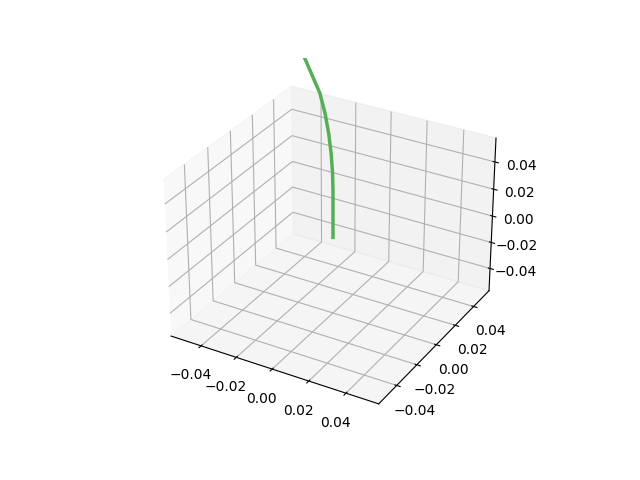

In [6]:
# last cell is only needed for the gallary thumbnail
display(fig)